In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [28]:
headerList = ['EventID', 'Path length (mm)', 'step length (mm)', 'Loss Energy (MeV)', 'Kinetic Energy (MeV)', 'z (mm)']

originalData = pd.read_csv('StepSD_nt_Step.csv', skiprows=10, names=headerList)
processedData = pd.DataFrame(columns=headerList)


In [29]:
originalData.head()

,EventID,Path length (mm),step length (mm),Loss Energy (MeV),Kinetic Energy (MeV),z (mm)
0,1,0.000434,0.000434,0.000014,5.48999,0.0000
1,1,0.064719,0.064285,0.008499,5.48047,0.0004
2,1,0.124236,0.059518,0.006704,5.47249,0.0647
3,1,0.141714,0.017477,0.001018,5.46851,0.1242
4,1,0.220866,0.079152,0.007975,5.45886,0.1417


In [30]:
for i in range(len(originalData)):
    if originalData['Kinetic Energy (MeV)'][i] < 0.01:
        continue
    if originalData['EventID'][i] == 1:
        processedData = processedData.append(originalData.iloc[i], ignore_index=True)
        

In [31]:
processedData.head()

,EventID,Path length (mm),step length (mm),Loss Energy (MeV),Kinetic Energy (MeV),z (mm)
0,1.0,0.000434,0.000434,0.000014,5.48999,0.0000
1,1.0,0.064719,0.064285,0.008499,5.48047,0.0004
2,1.0,0.124236,0.059518,0.006704,5.47249,0.0647
3,1.0,0.141714,0.017477,0.001018,5.46851,0.1242
4,1.0,0.220866,0.079152,0.007975,5.45886,0.1417


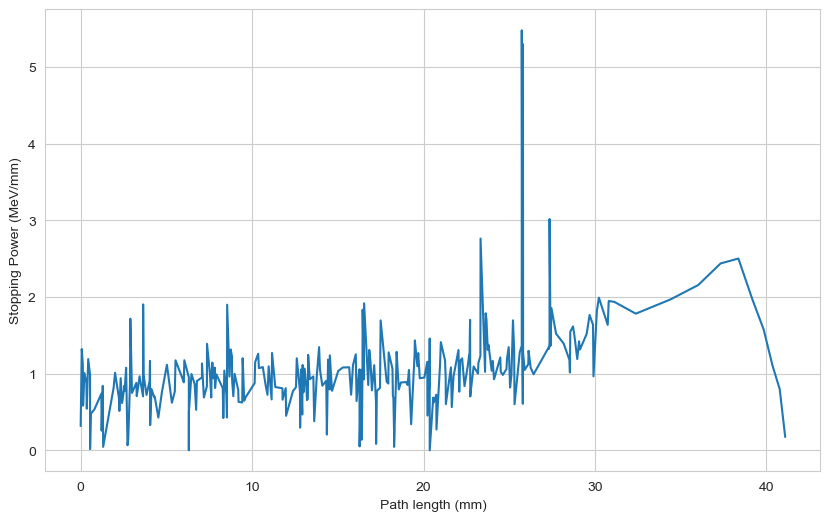

In [46]:
# plot data
# x = 0 to 50 mm
# y = Stopping Power (MeV/mm)
# you need to calculate the stopping power from the energy loss and step length
# stopping power = energy loss / step length

plt.figure(figsize=(10, 6))

X = processedData['Path length (mm)']
Y = 10 * processedData['Loss Energy (MeV)'] / processedData['step length (mm)']

sns.set_style('whitegrid')
ax = sns.lineplot(x=X, y=Y, data=processedData)
ax.set(xlabel='Path length (mm)', ylabel='Stopping Power (MeV/mm)')
plt.show()

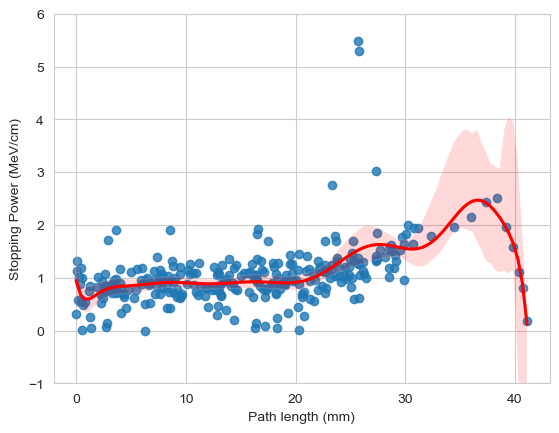

In [47]:
ax1 = sns.regplot(x=X, y=Y, data=processedData, order=13, line_kws={'color': 'red'})
ax1.set(xlabel='Path length (mm)', ylabel='Stopping Power (MeV/cm)', ylim=(-1, 6))
plt.show()

In [ ]:
# add z position until it reaches 0.5 mm
# add Loss Energy too
# if z position is 0.1 mm, then stop adding
# record it as a new event
cutData = pd.DataFrame(columns=['z (mm)', 'Loss Energy (MeV)', 'stepz (mm)'])

checkZ = 0.0
checkLoss = 0.0

for i in range(len(processedData)-1):
    stepz = processedData['z (mm)'][i+1] - processedData['z (mm)'][i]
    
    if checkZ >= 0.05:
        cutData = cutData.append({'z (mm)': checkZ, 'Loss Energy (MeV)': checkLoss, 'stepz (mm)': stepz}, ignore_index=True)
        checkZ = 0.0
        checkLoss = 0.0
    else:
        checkZ += stepz
        checkLoss += processedData['Loss Energy (MeV)'][i]
    
cutData.head()

,z (mm),Loss Energy (MeV),stepz (mm)
0,0.0647,0.008512,0.0595
1,0.0967,0.008992,0.1132
2,0.1072,0.011212,0.1066
3,0.2572,0.013387,0.4030
4,0.0809,0.005881,0.0236


<AxesSubplot:xlabel='z (mm)'>

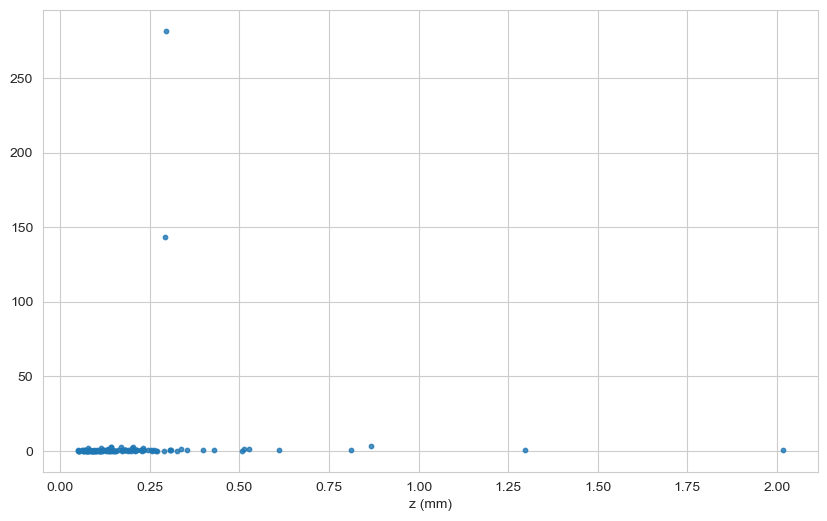

In [ ]:
plt.figure(figsize=(10, 6))

X = cutData['z (mm)']
Y = cutData['Loss Energy (MeV)'] / cutData['stepz (mm)']

sns.regplot(x=X, y=Y, fit_reg=False, scatter_kws={'s': 10})
